# Deep Learning 2019
## Assignment 3 - Convolutional Neural Networks
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __May 14th, 2019, 9AM__.

Programming assignments have to be completed using Python 3. __Please do not use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Activation Maps and Parameters

Consider the convolutional network defined by the layers in the left column below. Fill in the size of the activation maps and the number of parameters at each layer. You can write your answer as a multiplication (e.g. $128 \times 128 \times 3$).

1. CONV5-$N$ denotes a convolutional layer with $N$ filters, each of size  $5\times 5 \times D$ where $D$ is the depth of the activation map at the previous layer. Padding is $2$ and stride is $1$. 
2. POOL2 denotes $2 \times 2$  max-pooling layer with stride $2$ (pad $0$).

| Layer      | Dimensions of Activation  Map            | Number of parameters |
| -----------|:----------------------------------------:| --------------------:|
| Input      | $32 \times 32 \times 1$                  | 0                    |
| CONV5-$10$ | (TODO)                                   | (TODO)               |
| POOL2      | (TODO)                                   | (TODO)               |

#### Solution

Note that the ouput dimension $w_{out}$ is related to input dimension $w_{in}$, padding $w_{pad}$ and filter width $k$ as
\begin{equation}
    w_{out} = \frac{w_{in} + w_{pad} - k}{s} + 1.
\end{equation}
Therefore for layer CONV5-$10$ we obtain height and width as $w_{out} = \frac{32 + 4 - 5}{1} + 1 = 32$. As there are $10$ filters, the depth of the activation map corresponds to $10$. The total number for parameters will be $N \times (5 \times 5 \times 1) + N$.

Similarly for POOL2, the dimensions of the activation map will be $16 \times 16\times 10$. The numbers of parameters will be $0$.

| Layer      | Dimensions of Activation  Map            | Number of parameters |
| -----------|:----------------------------------------:| --------------------:|
| Input      | $32 \times 32 \times 1$                  | 0                    |
| CONV5-$10$ | $32 \times 32 \times 10$                 | $10 \times 25 +10$    |
| POOL2      | $16 \times 16\times 10 $                 | 0                    |

### 2. Loss Function and Chain Rule
Consider the following $1$-dimensional ConvNet, where all variables are scalars. 

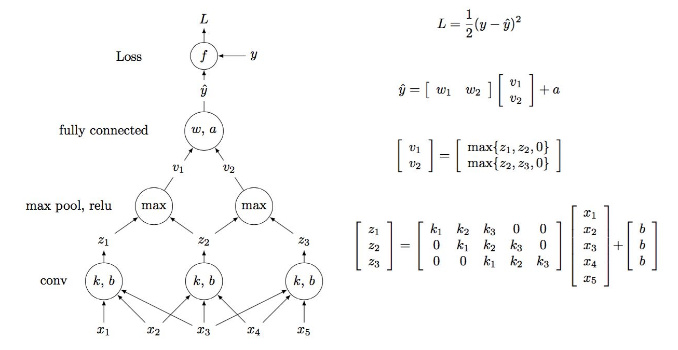


Given the gradients of the loss $L$ with respect to second layer activations $v$, derive the gradient of the loss with respect to the first layer activations $z$. More precisely, given 

\begin{equation}
    \frac{\partial L}{\partial v_{1}} = \delta_{1} \quad \frac{\partial L}{\partial v_{2}} = \delta_{2}
\end{equation}
derive
\begin{equation}
    \frac{\partial L}{\partial z_{1}}, \frac{\partial L}{\partial z_{2}} \text{ and } \frac{\partial L}{\partial z_{3}}.
\end{equation}

#### Solution
\begin{equation}
    \frac{\partial L}{\partial z_{1}} = \frac{\partial L}{\partial v_{1}} \cdot \frac{\partial v_1}{\partial z_{1}}
\end{equation}

Now $\frac{\partial v_1}{\partial z_{1}} = 1$ iff $z_1 > z_2$ and $z_1 >0$, otherwise it is $0$. Therefore 
\begin{equation}
    \frac{\partial L}{\partial z_{1}} = \delta_1 \cdot \mathbb{1}_{z_1 > z_2, z_1 > 0}.
\end{equation}
Similarly, 
\begin{equation} 
    \frac{\partial L}{\partial z_{2}} = \frac{\partial L}{\partial v_{1}} \cdot \frac{\partial v_1}{\partial z_{2}} + \frac{\partial L}{\partial v_{2}} \cdot \frac{\partial v_2}{\partial z_{2}} = \delta_1 \cdot \mathbb{1}_{(z_2 > z_1, z_2 > 0)} + \delta_2 \cdot \mathbb{1}_{(z_2 > z_3, z_2 > 0)}
\end{equation}
and 
\begin{equation} 
    \frac{\partial L}{\partial z_{3}} = \delta_2 \cdot \mathbb{1}_{z_3 > z_2, z_3 > 0}.
\end{equation}

### 3. CNN Forward Pass
In this exercise we address a convolutional neural network (CNN) with one-dimensional input. While two-dimensional CNNs can be used for example for grayscale images, one-dimensional CNNs could be used for time-series such as temperature or humidity readings. Concepts for the 1D-case are equivalent to 2D networks. We interpret data in our network as three-dimensional arrays where a row denotes a feature map, a column denotes a single dimension of the observation, and the depth of the array represents different observations. As we will only work with a single input vector, the depth will always be one.

Let the following CNN be given:
* Input $I$: Matrix of size $1 \times 12 \times 1$. We therefore have an input with twelve dimensions consisting of a single feature map.
* First convolutional layer with filters $F_0^1 = (-1, 0, 1)$ and $F_1^1 = (1, 0, -1)$ that generates two output feature maps from a single input feature map. Use valid mode for convolutions.
* Max-pooling layer with stride $2$ and filter size $2$. Note that max-pooling pools each feature map separately.
* Convolutional layer with convolutional kernel $F_0^2 = ((-1, 0, 1), (1, 0, -1))$ of size $2 \times 3 \times 1$.
* Fully connected layer that maps all inputs to two outputs. The first output is calculated as the negative sum of all its inputs, and the second layer is calculated as the positive sum of all its inputs.
* Sigmoidal activation function

Calculate the response of the CNN for the input $(0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0)$.

#### Solution
We start by calculating the outputs of the two filters in the first layer. Since the filters are $3$-dimensional and the stride is $1$, we end up with $10$-dimensional vectors (because we use valid mode there is no padding).
* $F_0^1$: $(0, 0, 1, 1, 0, 0, -1, -1, 0, 0)$
* $F_1^1$: $(0, 0, -1, -1, 0, 0, 1, 1, 0, 0)$

Applying the max-pooling layer further reduces the vectors to
* $(0, 1, 0, -1, 0)$
* $(0, -1, 0, 1, 0)$

The second convolutional layer only has a single filter and hence outputs only a single vector:
* $(0, -4, 0)$

Finally we take the negative and positive sum and end up with the outputs $\sigma(4)$ and $\sigma(-4)$.

### 4. Detecting Separators in Scanned Newspapers
In this task we want to implement a convolutional net that is able to detect the lines that separate columns and articles in scanned newspapers. Since many OCR programs have problems detecting these thin separators, we train a neural network to do the job.

The `data` directory contains a high-res scan of a newspaper page. Additionally there is an image with the same dimensions which contains the ground-truth, i.e. those pixels that show a separating line in the original image are marked black in the ground truth, while all other pixels are white.

Or model works as follows: The idea is to slice the original image into a lot of very small (say $15 \times 15$ pixels) squares. We then train a neural net to classify these squares as either separator or non-separator. A square should be considered to contain a separator if at least a certain ratio of the corresponding square in the ground truth data is marked as a separator.

We can use the `skimage` library to read the images:

In [1]:
import os
import skimage.io
import numpy as np
from matplotlib import pyplot

def read_data(img_file_path, gt_file_path, convert_to_grayscale=False):
    if convert_to_grayscale:
        # imread flattens to shape (h, w) instead of (h, w, 1)
        img = skimage.io.imread(img_file_path, mode='L', as_gray=True)
        h, w = img.shape
        img = img.reshape((h, w, 1))
    else:
        img = skimage.io.imread(img_file_path)
    # the GT only contains 2 labels, so we convert to monochrome
    gt = np.around(skimage.io.imread(gt_file_path, mode='L', as_gray=True))
    return img, gt

img_file_path = os.path.join('data', 'img-001.jpg')
gt_file_path = os.path.join('data', 'img-001-gt.png')
img, gt = read_data(img_file_path, gt_file_path, True)

# plot the image and ground truth
pyplot.subplot(121)
pyplot.imshow(img.reshape(*img.shape[:2]), cmap='gray')
pyplot.subplot(122)
pyplot.imshow(gt, cmap='gray')
pyplot.show()

<Figure size 640x480 with 2 Axes>

#### Solution

1. Implement a function `get_images` which slices the images into squares of dimension $w \times h$. It should return an array of the images ($X$) and an array of the labels ($y$), i.e. either $0$ (no separator) or $1$ (separator). The label should be $1$ if the percentage of pixels in the corresponding ground truth square is at least `thresh` and $0$ otherwise. Slice the image into squares (experiment with different image sizes and thresholds).

In [2]:
def __gt_value(gt_img, thresh):
    if len(gt_img[gt_img == 0]) / len(gt_img.flatten()) > thresh:
        return 1
    return 0

def get_images(img_data, gt_img_data, h, w, thresh):
    X_ = []
    y_ = []

    height, width, _ = img_data.shape
    y = 0
    while y + h < height:
        x = 0
        while x + w < width:
            ix = np.ix_(range(y, y + h), range(x, x + w))
            img = img_data[ix]
            gt_img = gt_img_data[ix]
            
            X_.append(img)
            y_.append(__gt_value(gt_img, thresh))

            x += w
        y += h
    return np.asarray(X_), np.asarray(y_)

X, y = get_images(img, gt, 15, 15, 0.1)

2. Create the model. Your model should have roughly this layout (in this order):
    * A number of `Conv2D` and `MaxPooling2D` layers. These are used to learn an image representation.
    * A `Flatten` layer.
    * Some `Dense` and `Dropout` layers for the classification. The output layer should have a single neuron and sigmoid activation so it outputs a probability.
    
   Experiment with different models (layers, kernels, activation functions, optimizers). You can start by modifying the example MNIST model from the CNN lecture notebook. Note that you should use __binary crossentropy loss__ since our model only outputs a single probability.

In [3]:
from tensorflow import keras

def get_net(img_h, img_w, channels, kernels, init_size, dropout, dense_size):
    layers = [
        keras.layers.Conv2D(init_size, kernels, input_shape=(img_h, img_w, channels), activation='relu'),
        keras.layers.Conv2D(2 * init_size, kernels, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(dense_size, activation='relu'),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(1, activation='sigmoid')
    ]
    return keras.models.Sequential(layers)

net = get_net(15, 15, 1, 3, 64, 0.1, 128)
net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


3. Split the data in $80\%$ training and $20\%$ test sets.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

4. Since there are only a few separators on the page, we have a lot more images in the negative class (no separator). Balance the __training dataset__ by removing random instances until there are the same number of examples for each class.

In [5]:
import random

def balance(X, y):
    assert len(X) == len(y)
    tr, fa = [], []
    for X_, y_ in zip(X, y):
        if y_ == 1:
            tr.append(X_)
        else:
            fa.append(X_)
    random.shuffle(tr)
    random.shuffle(fa)
    l = min(len(tr), len(fa))
    X_new = np.asarray(tr[:l] + fa[:l])
    y_new = np.asarray([1] * l + [0] * l) 
    return X_new, y_new

X_train, y_train = balance(X_train, y_train)

5. Train your model. Use validation ($10\%$ of the training data) and early stopping. Monitor the validation loss and save the best checkpoint in a file (use `monitor='val_loss'` and `save_best_only=True`). _Hint_: Use a slightly larger `patience` setting.

In [6]:
cb_ckpt = keras.callbacks.ModelCheckpoint('ckpt', monitor='val_loss', save_best_only=True, save_weights_only=True)
cb_early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
net.fit(X_train, y_train, epochs=100, callbacks=[cb_early_stop, cb_ckpt], validation_split=0.1)

Train on 1719 samples, validate on 191 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1664/1719 [============================>.] - ETA: 0s - loss: 0.6920 - acc: 0.5541- ETA: 0s - loss: 0.6929 - acc: 0.55WARNING:tensorflow:This model was compiled with a Keras optimizer (<tensorflow.python.keras.optimizers.Adam object at 0x7fcab9f06320>) but is being saved in TensorFlow format with `save_weights`. The model's weights will be saved, but unlike with TensorFlow optimizers in the TensorFlow format the optimizer's state will not be saved.

Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
1719/1719 [==============================] - 1s 841us/sample - loss: 0.6923 - acc: 0.5526 - val_loss: 0.8402 - val_acc: 0.0000e+00
Epoch 2/100
1664/1719 [============================>.] - ETA: 0s - loss: 0.6786 - acc: 0.5571WARNING:tensorflow:This model 

1719/1719 [==============================] - 1s 704us/sample - loss: 0.1427 - acc: 0.9523 - val_loss: 0.2083 - val_acc: 0.9529
Epoch 20/100
1719/1719 [==============================] - 1s 716us/sample - loss: 0.1411 - acc: 0.9494 - val_loss: 0.4427 - val_acc: 0.8639
Epoch 21/100
1719/1719 [==============================] - 1s 701us/sample - loss: 0.1256 - acc: 0.9570 - val_loss: 0.2516 - val_acc: 0.9319
Epoch 22/100
1719/1719 [==============================] - 1s 706us/sample - loss: 0.1237 - acc: 0.9610 - val_loss: 0.3017 - val_acc: 0.9215
Epoch 23/100
1719/1719 [==============================] - 1s 706us/sample - loss: 0.1184 - acc: 0.9645 - val_loss: 0.2100 - val_acc: 0.9215
Epoch 24/100
1719/1719 [==============================] - 1s 704us/sample - loss: 0.1085 - acc: 0.9680 - val_loss: 0.3463 - val_acc: 0.8901
Epoch 25/100
1719/1719 [==============================] - 1s 775us/sample - loss: 0.1020 - acc: 0.9645 - val_loss: 0.4667 - val_acc: 0.8691
Epoch 26/100
1719/1719 [=========

6. Load your saved checkpoint and evaluate your model. Use `sklearn.metrics.classification_report` and `sklearn.metrics.confusion_matrix`.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

net.load_weights('ckpt')
pred = np.round(net.predict(X_test))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     14240
           1       0.28      0.94      0.44       243

   micro avg       0.96      0.96      0.96     14483
   macro avg       0.64      0.95      0.71     14483
weighted avg       0.99      0.96      0.97     14483

[[13665   575]
 [   14   229]]
